<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">librerias</div>


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import nibabel as nib
from nilearn import image
from nilearn.image import resample_to_img
from nilearn.image import resample_to_img
import nipype.interfaces.fsl as fsl
import nipype.pipeline.engine as pe
import nipype.interfaces.utility as niu
from nipype.interfaces.mipav.developer import (JistIntensityMp2rageMasking,
                                               MedicAlgorithmSPECTRE2010)

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Cargar imagen para inspección visual</div>


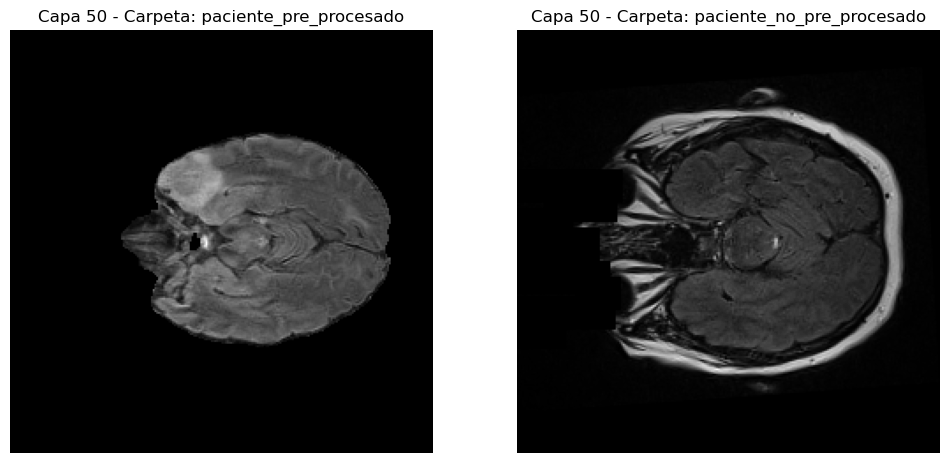

(240, 240, 155)
(240, 240, 155)


In [42]:
# Cargar el archivo .nii
def cargar_nii(archivo):
    """
    Carga un archivo .nii (NIfTI) y devuelve la imagen como un array de NumPy.
    
    :param archivo: Ruta al archivo .nii
    :return: Imagen cargada como un array de NumPy
    """
    imagen_nifti = nib.load(archivo)
    imagen_array = imagen_nifti.get_fdata()
    return imagen_array

# Extraer una carpeta específica de la ruta
def extraer_carpeta_especifica(archivo, indice=1):
    """
    Extrae una carpeta específica de la ruta del archivo.
    
    :param archivo: Ruta del archivo
    :param indice: Índice de la carpeta deseada (0 es la carpeta raíz)
    :return: Nombre de la carpeta especificada
    """
    partes_ruta = os.path.normpath(archivo).split(os.sep)
    if indice < len(partes_ruta):
        return partes_ruta[indice]
    else:
        return "Carpeta no encontrada"

# Mostrar las capas específicas de las imágenes en subgráficas
def mostrar_subplots(imagen1, archivo1, imagen2, archivo2, capa=50, indice_carpeta=1):
    """
    Muestra una capa específica de dos imágenes de resonancia magnética en subgráficas.
    
    :param imagen1: Primer array de imagen cargada
    :param archivo1: Ruta del primer archivo para extraer el nombre de la carpeta
    :param imagen2: Segundo array de imagen cargada
    :param archivo2: Ruta del segundo archivo para extraer el nombre de la carpeta
    :param capa: Índice de la capa a mostrar
    :param indice_carpeta: Índice de la carpeta a mostrar en el título
    """
    carpeta1 = extraer_carpeta_especifica(archivo1, indice_carpeta)
    carpeta2 = extraer_carpeta_especifica(archivo2, indice_carpeta)
    
    plt.figure(figsize=(12, 6))
    
    # Primer subplot
    plt.subplot(1, 2, 1)
    plt.imshow(imagen1[:, :, capa], cmap='gray')
    plt.title(f'Capa {capa} - Carpeta: {carpeta1}')
    plt.axis('off')
    
    # Segundo subplot
    plt.subplot(1, 2, 2)
    plt.imshow(imagen2[:, :, capa], cmap='gray')
    plt.title(f'Capa {capa} - Carpeta: {carpeta2}')
    plt.axis('off')
    
    plt.show()

# Rutas de los archivos .nii
nii_pre_processado = '../paciente_pre_procesado/UPENN-GBM-00001_11_FLAIR.nii'
nii_no_pre_processado = '../paciente_no_pre_procesado/UPENN-GBM-00096_11_FLAIR_unstripped.nii'

# Cargar las imágenes
imagen1 = cargar_nii(nii_pre_processado)
imagen2 = cargar_nii(nii_no_pre_processado)

# Mostrar las capas específicas en subgráficas
mostrar_subplots(imagen1, nii_pre_processado, imagen2, nii_no_pre_processado, capa=50, indice_carpeta=1)
print(imagen1.shape)
print(imagen2.shape)


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Registro de los pacientes (corregir orientación)</div>


In [43]:
def reorient_image(reference_image_path, image_to_reorient_path, output_path):
    """
    Reorienta una imagen a la orientación de una imagen de referencia y guarda el resultado.

    Parameters:
    - reference_image_path (str): Ruta del archivo .nii de referencia.
    - image_to_reorient_path (str): Ruta del archivo .nii que se quiere reorientar.
    - output_path (str): Ruta donde se guardará la imagen reorientada.
    """
    # Verificar si los archivos existen
    if not (os.path.exists(reference_image_path) and os.path.exists(image_to_reorient_path)):
        raise FileNotFoundError("Uno o ambos archivos no se encontraron.")

    try:
        # Cargar las imágenes
        imagen1 = nib.load(image_to_reorient_path)  # Imagen a reorientar
        imagen2 = nib.load(reference_image_path)  # Imagen de referencia
        
        # Comprobar los tipos de datos
        print("Tipo de imagen a reorientar:", type(imagen1))  # Debería mostrar <class 'nibabel.nifti1.Nifti1Image'>
        print("Tipo de imagen de referencia:", type(imagen2))  # Debería mostrar <class 'nibabel.nifti1.Nifti1Image'>
        
        # Mostrar información básica de las imágenes
        print("Imagen a reorientar:")
        print("Tipo de datos:", imagen1.get_data_dtype())
        print("Forma:", imagen1.shape)
        
        print("\nImagen de referencia:")
        print("Tipo de datos:", imagen2.get_data_dtype())
        print("Forma:", imagen2.shape)

        # Reorientar la imagen
        reoriented_img = resample_to_img(imagen1, imagen2, interpolation='nearest')

        # Guardar la imagen reorientada
        reoriented_img.to_filename(output_path)

        print(f"Reorientación completa y imagen guardada como '{output_path}'.")

    except Exception as e:
        print(f"Error al cargar las imágenes o realizar la reorientación: {e}")

# Ejemplo de uso
nii_pre_processado = '../paciente_pre_procesado/UPENN-GBM-00001_11_FLAIR.nii'
nii_no_pre_processado = '../paciente_no_pre_procesado/UPENN-GBM-00096_11_FLAIR_unstripped.nii'
output_image = 'tu_imagen_reorientada.nii'

reorient_image(nii_pre_processado, nii_no_pre_processado, output_image)


Tipo de imagen a reorientar: <class 'nibabel.nifti1.Nifti1Image'>
Tipo de imagen de referencia: <class 'nibabel.nifti1.Nifti1Image'>
Imagen a reorientar:
Tipo de datos: int16
Forma: (240, 240, 155)

Imagen de referencia:
Tipo de datos: int16
Forma: (240, 240, 155)
Reorientación completa y imagen guardada como 'tu_imagen_reorientada.nii'.


/opt/anaconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:492: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Normalizar intensidad de las imagenes (Ajustar escala de grises entre [0-1] )</div>


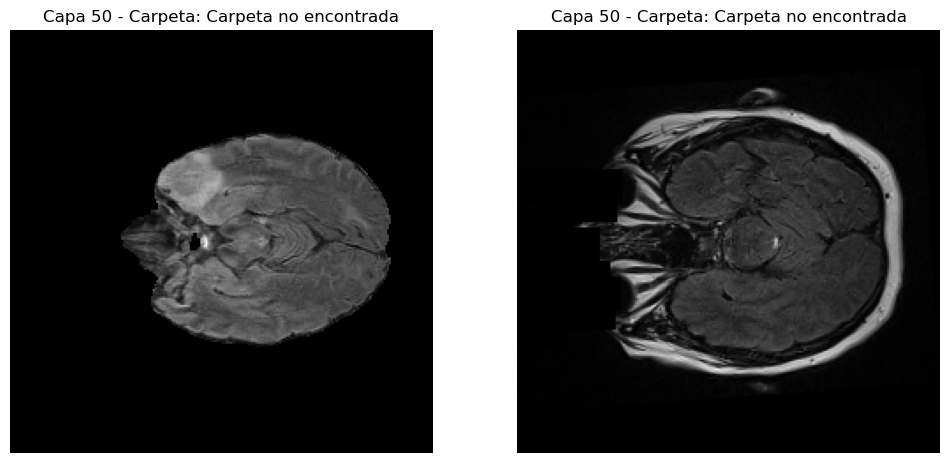

In [44]:
def normalize_image(image_path, output_path):
    """
    Normaliza la escala de grises de una imagen y guarda el resultado.

    Parameters:
    - image_path (str): Ruta del archivo .nii de la imagen.
    - output_path (str): Ruta donde se guardará la imagen normalizada.
    """
    # Cargar la imagen
    img = nib.load(image_path)
    data = img.get_fdata()

    # Normalizar la escala de grises
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)

    # Crear una nueva imagen con los datos normalizados
    normalized_img = nib.Nifti1Image(normalized_data, img.affine, img.header)
    
    # Guardar la imagen normalizada
    normalized_img.to_filename(output_path)

    print(f"Imagen normalizada guardada como '{output_path}'.")

# Ejemplo de uso
# Rutas de los archivos .nii
nii_pre_processado = '../paciente_pre_procesado/UPENN-GBM-00001_11_FLAIR.nii'
nii_no_pre_processado = '../paciente_no_pre_procesado/UPENN-GBM-00096_11_FLAIR_unstripped.nii'
output_image = 'tu_imagen_normalizada.nii'

# Cargar las imágenes
imagen1 = cargar_nii(nii_pre_processado)
imagen2 = cargar_nii(nii_no_pre_processado)
imagen3 = cargar_nii(output_image)



mostrar_subplots(imagen1, nii_pre_processado, imagen3, output_image, capa=50, indice_carpeta=3)


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Segmentar solo la estructura cerebral (skullstripping) </div>


In [48]:
import os
import nibabel as nib

def convert_nii_to_nii_gz(input_path, output_path):
    # Load the .nii file
    img = nib.load(input_path)
    # Save it as .nii.gz
    nib.save(img, output_path)

# Define the folder path
folder_path = '/Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/'

# List of files to convert
files_to_convert = [
    "UPENN-GBM-00096_11_FLAIR_unstripped.nii",
    "UPENN-GBM-00096_11_T1GD_unstripped.nii",
    "UPENN-GBM-00096_11_T1_unstripped.nii"
]

# Convert each file
for file_name in files_to_convert:
    input_file = os.path.join(folder_path, file_name)
    output_file = os.path.join(folder_path, file_name + ".gz")
    convert_nii_to_nii_gz(input_file, output_file)
    print(f"Converted {input_file} to {output_file}")

Converted /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_FLAIR_unstripped.nii to /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_FLAIR_unstripped.nii.gz
Converted /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_T1GD_unstripped.nii to /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_T1GD_unstripped.nii.gz
Converted /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_T1_unstripped.nii to /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_T1_unstripped.nii.gz


In [49]:
wf = pe.Workflow("skullstripping")

mask = pe.Node(JistIntensityMp2rageMasking(), name="masking")
folder_path = '/Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/'
print('folder_path', folder_path)

mask.inputs.inSecond = folder_path + "UPENN-GBM-00096_11_FLAIR_unstripped.nii"
mask.inputs.inQuantitative = folder_path + "UPENN-GBM-00096_11_T1GD_unstripped.nii.gz"
mask.inputs.inT1weighted = folder_path + "UPENN-GBM-00096_11_T1_unstripped.nii.gz"
#mask.inputs.inT2weighted = folder_path + "MP2RAGE_T2.nii.gz"
mask.inputs.outMasked = True
mask.inputs.outMasked2 = True
mask.inputs.outSignal = True
mask.inputs.outSignal2 = True
skullstrip = pe.Node(MedicAlgorithmSPECTRE2010(), name="skullstrip")
skullstrip.inputs.outStripped = True
skullstrip.inputs.xDefaultMem = 6000

wf.connect(mask, 'outMasked', skullstrip, 'inInput')
wf.run()

folder_path /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/
240915-11:48:13,462 nipype.workflow INFO:
	 Workflow skullstripping settings: ['check', 'execution', 'logging', 'monitoring']
240915-11:48:13,466 nipype.workflow INFO:
	 Running serially.
240915-11:48:13,467 nipype.workflow INFO:
	 [Node] Setting-up "skullstripping.masking" in "/private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking".
240915-11:48:13,470 nipype.workflow INFO:
	 [Node] Executing "masking" <nipype.interfaces.mipav.developer.JistIntensityMp2rageMasking>
240915-11:48:13,644 nipype.interface INFO:
	 stderr 2024-09-15T11:48:13.644691:Error: no se ha encontrado o cargado la clase principal edu.jhu.ece.iacl.jist.cli.run
240915-11:48:13,700 nipype.workflow INFO:
	 [Node] Finished "masking", elapsed time 0.228248s.
240915-11:48:13,700 nipype.workflow WARNING:
	 Storing result file without outputs
240915-11:48:13,701 nipype.workflow WARNIN

NodeExecutionError: Exception raised while executing Node masking.

Cmdline:
	java edu.jhu.ece.iacl.jist.cli.run de.mpg.cbs.jist.intensity.JistIntensityMp2rageMasking  --inQuantitative /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_T1GD_unstripped.nii.gz --inSecond /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_FLAIR_unstripped.nii --inT1weighted /Users/imeag/Documents/udea/pis3/IA_AutomaticTumorSegmentationModel/paciente_no_pre_procesado/UPENN-GBM-00096_11_T1_unstripped.nii.gz --outMasked_T1_Map /private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking/outMasked.nii --outMasked_T1weighted /private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking/outMasked2.nii --outSignal_Proba /private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking/outSignal.nii --outSignal_Mask /private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking/outSignal2.nii -xMaxProcess 1
Stdout:

Stderr:
	Error: no se ha encontrado o cargado la clase principal edu.jhu.ece.iacl.jist.cli.run
Traceback:
	Traceback (most recent call last):
	  File "/opt/anaconda3/lib/python3.12/site-packages/nipype/interfaces/base/core.py", line 453, in aggregate_outputs
	    setattr(outputs, key, val)
	  File "/opt/anaconda3/lib/python3.12/site-packages/nipype/interfaces/base/traits_extension.py", line 330, in validate
	    value = super(File, self).validate(objekt, name, value, return_pathlike=True)
	            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	  File "/opt/anaconda3/lib/python3.12/site-packages/nipype/interfaces/base/traits_extension.py", line 135, in validate
	    self.error(objekt, name, str(value))
	  File "/opt/anaconda3/lib/python3.12/site-packages/traits/base_trait_handler.py", line 74, in error
	    raise TraitError(
	traits.trait_errors.TraitError: The 'outSignal' trait of a JistIntensityMp2rageMaskingOutputSpec instance must be a pathlike object or string representing an existing file, but a value of '/private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking/outSignal.nii' <class 'str'> was specified.

	During handling of the above exception, another exception occurred:

	Traceback (most recent call last):
	  File "/opt/anaconda3/lib/python3.12/site-packages/nipype/interfaces/base/core.py", line 400, in run
	    outputs = self.aggregate_outputs(runtime)
	              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	  File "/opt/anaconda3/lib/python3.12/site-packages/nipype/interfaces/base/core.py", line 460, in aggregate_outputs
	    raise FileNotFoundError(msg)
	FileNotFoundError: No such file or directory '/private/var/folders/yk/3vx3n6n56b1fdxhf9f5lmlyr0000gn/T/tmprnau_j43/skullstripping/masking/outSignal.nii' for output 'outSignal' of a JistIntensityMp2rageMasking interface


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Filtrado para obtener unicamente el cerebro</div>

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Filtrado para obtener unicamente el cerebro</div>